In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("dados_matriculas.xlsx")

display(df)

,Mês,Matrículas
0,2022-01-31,302
1,2022-02-28,470
2,2022-03-31,306
3,2022-04-30,271
4,2022-05-31,388
5,2022-06-30,220
6,2022-07-31,302
7,2022-08-31,321
8,2022-09-30,414
9,2022-10-31,287


In [2]:
# Identificar o mês com maior e menor número de matrículas
maior_matricula = df['Matrículas'].max()
indice_maior_matricula = df['Matrículas'].idxmax()

print(indice_maior_matricula)
print(maior_matricula)

1
470


In [3]:
menor_matricula = df['Matrículas'].min()
indice_menor_matricula = df['Matrículas'].idxmin()

print(indice_menor_matricula)
print(menor_matricula)

5
220


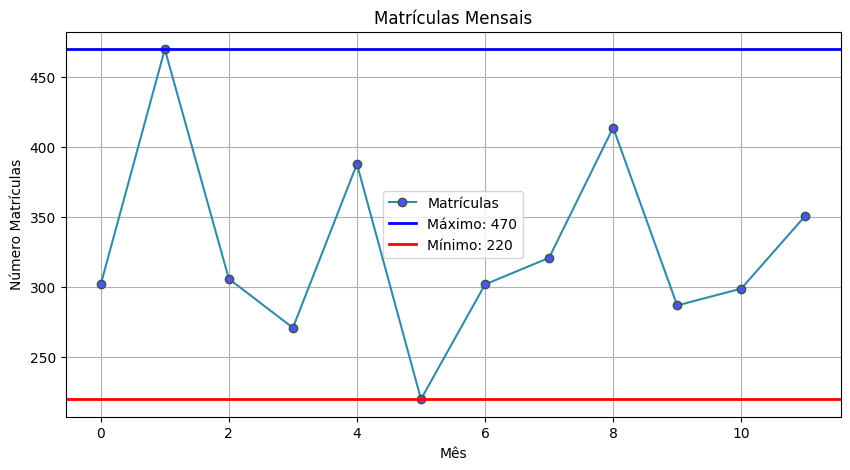

In [4]:
# Plotar o grafico das matriculas mensais e destacar os maiores e menores picos de matriculas
plt.figure(figsize=(10, 5))
df['Matrículas'].plot(marker='o', mfc='#594fe8', mec='#275c4f', linestyle='-', color='#328ba8', label='Matrículas')

# Informações de destaque
plt.axhline(y=maior_matricula, color='blue', linestyle='-', linewidth=2, label=f"Máximo: {maior_matricula}")
plt.axhline(y=menor_matricula, color='red', linestyle='-', linewidth=2, label=f"Mínimo: {menor_matricula}")

plt.title('Matrículas Mensais')
plt.xlabel('Mês')
plt.ylabel('Número Matrículas')
plt.grid(True)
plt.legend()
plt.show()


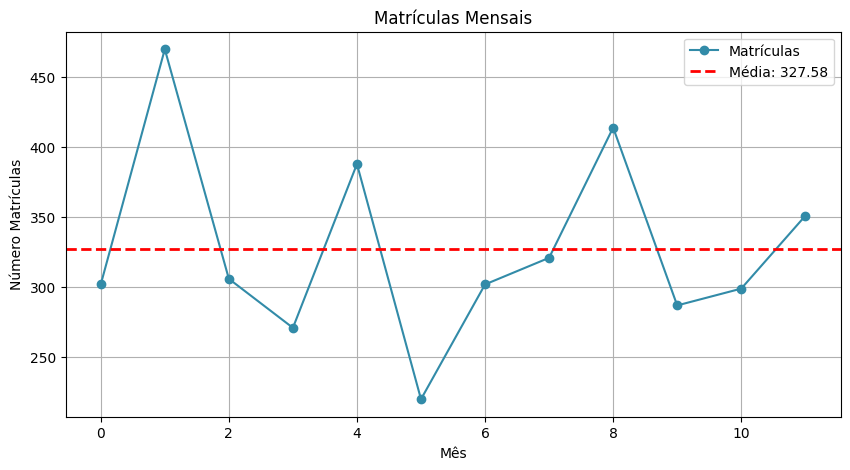

In [5]:
# Plotar o grafico das matriculas mensais e destacar a media
media_matricula = df['Matrículas'].mean()

plt.figure(figsize=(10, 5))
df['Matrículas'].plot(marker='o', mfc='#328ba8', linestyle='-', color='#328ba8', label='Matrículas')

# Informações de destaque
plt.axhline(y=media_matricula, color='red', linestyle='--', linewidth=2, label=f"Média: {media_matricula:.2f}")

plt.title('Matrículas Mensais')
plt.xlabel('Mês')
plt.ylabel('Número Matrículas')
plt.grid(True)
plt.legend()
plt.show()

TENDÊNCIAS

In [6]:
# Calcular a media das matriculas por trimestre

# PASSO 1 - Converter a coluna para 'datetime'
df['Mês'] = pd.to_datetime(df['Mês'])

# PASSO 2 - Definir a coluna de indice como datas
df.set_index(df['Mês'], inplace=True)

# PASSO 3 - Calcular a média trimestral
# DIVISÕES:
# QE / Trimestre
# QS / Semestre
# Q / Quadrimestre
# A / Anual
# D / Diário
# W / Semanal
# H / Horário

media_trimestral = df['Matrículas'].resample('QE').mean()
print(media_trimestral)

Mês
2022-03-31    359.333333
2022-06-30    293.000000
2022-09-30    345.666667
2022-12-31    312.333333
Freq: QE-DEC, Name: Matrículas, dtype: float64


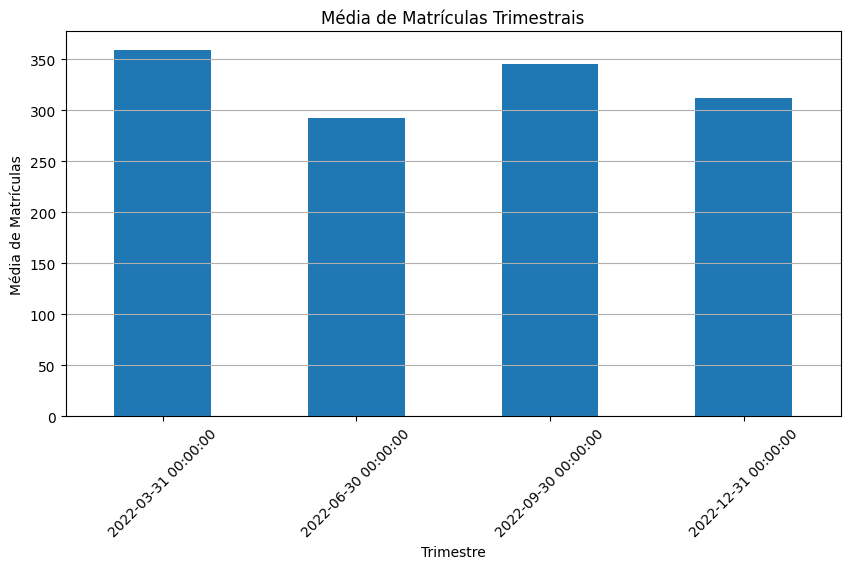

In [7]:
plt.figure(figsize=(10, 5))
media_trimestral.plot(kind='bar')

plt.title("Média de Matrículas Trimestrais")
plt.xlabel("Trimestre")
plt.ylabel("Média de Matrículas")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

DESVIO SIMPLES
PASSO 1 - Calcular a Média
PASSO 2 - Calcular o Desvio em relação a média

JAN = 340
FEV = 345
MAR = 355
ABR = 600

MEDIA = 410

DESVIO

JAN = 340 - 410 = -70

FEV = 345 - 410 = -65

MAR = 355 - 410 = -55

ABR = 600 - 410 = 190

In [8]:
# Desvio simples
df['Matrículas'] - df['Matrículas'].mean()

Mês
2022-01-31    -25.583333
2022-02-28    142.416667
2022-03-31    -21.583333
2022-04-30    -56.583333
2022-05-31     60.416667
2022-06-30   -107.583333
2022-07-31    -25.583333
2022-08-31     -6.583333
2022-09-30     86.416667
2022-10-31    -40.583333
2022-11-30    -28.583333
2022-12-31     23.416667
Name: Matrículas, dtype: float64

VARIÂNCIA
1. Média
2. Desvio simples

PASSO 1 - Valor do desvio elevado ao quadrado
JAN = -70 ^2 = 4900

FEV = -65 ^2 = 4225

MAR = -55 ^2 = 3025

ABR = 190 ^2 = 36100

PASSO 2 - Média do desvio elevado 

MÉDIA = 12062.5


DESVIO PADRÃO
1. Média
2. Desvio simples
3. Variância

PASSO 1 - Calcular a raiz quadrada da Variância
MÉDIA = 12062.5
RAIZ QUADRADA DA MÉDIA = 109.8




In [9]:
# Calcular a variação percentual mensal
variacao = df['Matrículas'].pct_change() * 100

In [10]:
import seaborn as sb

tabela_variacao = pd.DataFrame({
    'Matricula': df['Matrículas'],
    'Variação (%)': variacao
})

def colorir_variacao(valor):
    if valor > 0:
        color = 'green'
    elif valor < 0:
        color = 'red'
    else:
        color = 'blue'
    return f"color: {color}"
     
tabela_variacao.style.map(colorir_variacao, subset=['Variação (%)'])

,Matricula,Variação (%)
Mês,,
2022-01-31 00:00:00,302,nan
2022-02-28 00:00:00,470,55.629139
2022-03-31 00:00:00,306,-34.893617
2022-04-30 00:00:00,271,-11.437908
2022-05-31 00:00:00,388,43.173432
2022-06-30 00:00:00,220,-43.298969
2022-07-31 00:00:00,302,37.272727
2022-08-31 00:00:00,321,6.291391
2022-09-30 00:00:00,414,28.971963
